In [43]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()

test = pd.read_pickle("data_ws.pkl")
df = pd.read_pickle("data_vector.pkl")
df

# 用sequentail model
# 有負值用naive_bayes會失敗

,claim,claim_vector,label,category
0,臺灣強制性休假兩星期,"[[0.08602425, 0.06884487, -0.020684388, 0.0870...",1.0,健康
1,鑽石公主號19人已集中檢疫隔離，均無疑似症狀,"[[0.4836901, -0.10897254, 0.11396013, -0.02462...",1.0,健康
2,2009年接種H1N1新型流感疫苗造成40人死亡,"[[0.28004476, -0.0015825508, -0.5430369, -0.25...",1.0,健康
3,衛生福利部編製萊豬文宣發放予國小,"[[0.14155403, 0.3387575, -0.5798363, 0.4237482...",1.0,健康
4,旺旺水神抗菌液隨身瓶30ml，可口腔清潔抗菌，該產品施用於人體，具預防、減輕、或治療疾病,"[[0.59693605, 0.034474954, -0.16217811, 0.1320...",1.0,健康
...,...,...,...,...
14093,臺灣與日本共同舉辦2015年世界棒球12強賽,"[[0.09693621, 0.19439627, -0.10632501, -0.1481...",0.0,體育
14094,鄭南榕發起臺灣新國家運動30週年,"[[-0.33267313, 0.1022967, -0.093449, -0.492248...",0.0,體育
14095,歷史性的一天到來，臺灣和中國兩地的棒球員，在奧運賽場上相會前4局還是0比0平手，不過國手們5...,"[[0.9734926, -0.100687705, 0.27048045, -0.4343...",0.0,體育
14096,職棒假球案經板橋地檢署偵查終結，將簽賭集團首腦蔡政宜、台南縣議會議長吳健保、球員陳致遠、張誌...,"[[0.89870274, 0.013462262, -0.27372447, 0.2487...",0.0,體育


In [44]:
test

,WS,WS_vector,label,category
0,"[臺灣, 強制性, 休假, 兩, 星期]","[[[-0.08296506, 0.5268505, 0.030446913, -0.120...",1.0,健康
1,"[鑽石, 公主號, 19, 已, 集中, 檢疫, 隔離, 均, 無疑, 似, 症狀]","[[[0.029466612, -0.020512113, -0.77090454, -0....",1.0,健康
2,"[2009年, 接種, H1N1, 新型流感, 疫苗, 造成, 40, 死亡]","[[[-0.25464854, 0.6342728, -0.22650032, 0.0722...",1.0,健康
3,"[衛生, 福利部, 編製, 萊豬文, 宣發, 放予, 國小]","[[[-0.098869056, 0.031827707, -0.15626638, -0....",1.0,健康
4,"[旺旺, 水神, 抗菌液, 隨身瓶, 30, ml, 口腔, 清潔, 抗菌, 產品, 施用,...","[[[-0.4496754, 0.2676371, 0.026456987, -0.0110...",1.0,健康
...,...,...,...,...
5762,"[臺灣, 日本, 共同, 舉辦, 2015年, 世界, 棒球, 12, 強, 賽]","[[[-0.08296506, 0.5268505, 0.030446913, -0.120...",NaN,NaN
5763,"[鄭南榕, 發起, 臺灣, 新, 國家, 運動, 30, 週年]","[[[-0.34509623, -0.4151508, -0.08428, -0.27692...",NaN,NaN
5764,"[歷史性, 到來, 臺灣, 中國, 兩, 棒球員, 奧運, 賽場, 相會, 前, 局, 平手...","[[[-0.6659782, 0.51972526, -0.023435457, -0.15...",NaN,NaN
5765,"[職棒, 假球案, 板橋, 地檢署, 偵查, 終結, 簽賭, 集團, 首腦, 蔡政宜, 台南...","[[[0.3718169, 0.6149964, -0.04040765, 0.340657...",NaN,NaN


In [45]:
df.category.replace("生活","0",inplace=True)
df.category.replace("健康","1",inplace=True)
df.category.replace("娛樂","0",inplace=True)
df.category.replace("體育","2",inplace=True)
df.category.replace("政治","3",inplace=True)
df.category.replace("財經","4",inplace=True)
df.category.replace("財金","4",inplace=True)
df.category.replace("社會","0",inplace=True)
df.category.replace("國際外交","5",inplace=True)

'''
life:0
health:1
exercise:2
politic:3
finance:4
internation:5
'''

'\nlife:0\nhealth:1\nexercise:2\npolitic:3\nfinance:4\ninternation:5\n'

scaler.fit(raw_data.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)
x = scaled_data

y = raw_data['TARGET CLASS']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [46]:
target_feature = 'claim'
data = df.filter([target_feature + "_vector",'label'])
data

,claim_vector,label
0,"[[0.08602425, 0.06884487, -0.020684388, 0.0870...",1.0
1,"[[0.4836901, -0.10897254, 0.11396013, -0.02462...",1.0
2,"[[0.28004476, -0.0015825508, -0.5430369, -0.25...",1.0
3,"[[0.14155403, 0.3387575, -0.5798363, 0.4237482...",1.0
4,"[[0.59693605, 0.034474954, -0.16217811, 0.1320...",1.0
...,...,...
14093,"[[0.09693621, 0.19439627, -0.10632501, -0.1481...",0.0
14094,"[[-0.33267313, 0.1022967, -0.093449, -0.492248...",0.0
14095,"[[0.9734926, -0.100687705, 0.27048045, -0.4343...",0.0
14096,"[[0.89870274, 0.013462262, -0.27372447, 0.2487...",0.0


In [54]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(data["claim_vector"], test_size = 0.15, random_state = 10,shuffle=True)
train_data, test_data = train_test_split(data, random_state=77, train_size=0.9,shuffle=True)


In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4901,)
(866,)
(4901,)
(866,)


In [56]:
#test_data=data[(data.category!="健康")& (data.category!="生活")]
train_data=data[(data.category!="health")]
print(train_data)

AttributeError: 'DataFrame' object has no attribute 'category'

In [15]:
from sklearn.model_selection import train_test_split
test_data=data[data.category=="health"]
#train_data2=data[data.category=="生活"]
#train_data=pd.concat([train_data1,train_data2])
print(test_data)

Empty DataFrame
Columns: [claim_vector, category]
Index: []


In [57]:
x_train = train_data[target_feature + "_vector"].values
y_train = train_data['label'].values
x_train = np.vstack(x_train)
y_train = np.vstack(y_train)

x_test = test_data[target_feature + "_vector"].values
y_test = test_data['label'].values
x_test = np.vstack(x_test)
y_test = np.vstack(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5190, 768)
(5190, 1)
(577, 768)
(577, 1)


# classify category
x_train = train_data[target_feature + "_vector"].values
y_train = train_data['category'].values
x_train = np.vstack(x_train)
y_train = np.vstack(y_train)

x_test = test_data[target_feature + "_vector"].values
y_test = test_data['category'].values
x_test = np.vstack(x_test)
y_test = np.vstack(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# transfer category
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
y_train

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [59]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

input_dim = x_train.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(optimizer = adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100,batch_size=200, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4671 samples, validate on 519 samples
Epoch 1/100
4671/4671 - 1s - loss: 0.4676 - acc: 0.7718 - val_loss: 0.2948 - val_acc: 0.8709
Epoch 2/100
4671/4671 - 0s - loss: 0.2764 - acc: 0.8910 - val_loss: 0.2593 - val_acc: 0.8940
Epoch 3/100
4671/4671 - 0s - loss: 0.2491 - acc: 0.8977 - val_loss: 0.2458 - val_acc: 0.8921
Epoch 4/100
4671/4671 - 0s - loss: 0.2326 - acc: 0.9092 - val_loss: 0.2414 - val_acc: 0.8960
Epoch 5/100
4671/4671 - 0s - loss: 0.2209 - acc: 0.9165 - val_loss: 0.2368 - val_acc: 0.9075
Epoch 6/100
4671/4671 - 0s - loss: 0.2101 - acc: 0.9216 - val_loss: 0.2327 - val_acc: 0.9094
Epoch 7/100
4671/4671 - 0s - loss: 0.1981 - acc: 0.9259 - val_loss: 0.2260 - val_acc: 0.9191
Epoch 8/100
4671/4671 - 0s - loss: 0.1875 - acc: 0.9294 - val_loss: 0.2246 - val_acc: 0.9210
Epoch 9/100
4671/4671 - 0s - loss: 0.1781 - acc: 0.9349 - val_loss: 0.2274 - val_acc: 0.9171
Epoch 10/100
4671/4671

Epoch 85/100
4671/4671 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3837 - val_acc: 0.9171
Epoch 86/100
4671/4671 - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3856 - val_acc: 0.9133
Epoch 87/100
4671/4671 - 0s - loss: 0.0053 - acc: 0.9998 - val_loss: 0.3829 - val_acc: 0.9229
Epoch 88/100
4671/4671 - 0s - loss: 0.0048 - acc: 0.9998 - val_loss: 0.3909 - val_acc: 0.9171
Epoch 89/100
4671/4671 - 0s - loss: 0.0048 - acc: 0.9998 - val_loss: 0.3942 - val_acc: 0.9171
Epoch 90/100
4671/4671 - 0s - loss: 0.0048 - acc: 0.9998 - val_loss: 0.3896 - val_acc: 0.9229
Epoch 91/100
4671/4671 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.3931 - val_acc: 0.9171
Epoch 92/100
4671/4671 - 0s - loss: 0.0043 - acc: 0.9998 - val_loss: 0.3955 - val_acc: 0.9229
Epoch 93/100
4671/4671 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3962 - val_acc: 0.9229
Epoch 94/100
4671/4671 - 0s - loss: 0.0041 - acc: 0.9998 - val_loss: 0.3975 - val_acc: 0.9229
Epoch 95/100
4671/4671 - 0s - loss: 0.0043 - acc: 0.9996 - v

In [60]:
# testing data
score = model.evaluate(x_test, y_test)
print("test loss, test acc:", score)

577/577 [==============================] - 0s 34us/sample - loss: 0.4289 - acc: 0.9099
test loss, test acc: [0.4288840082375594, 0.9098787]


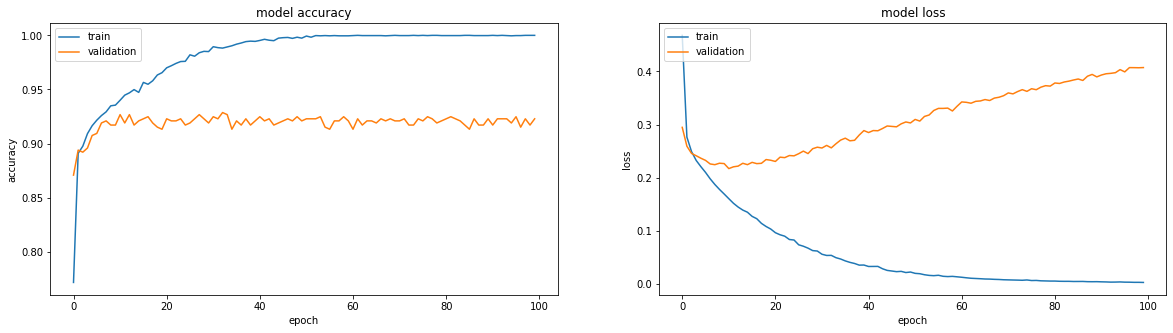

In [62]:
import matplotlib.pyplot as plt
plt.subplots(1,2,figsize=(20,5))
history_dict = history.history
#print(history_dict.keys())

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                49216     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 49,281
Trainable params: 49,281
Non-trainable params: 0
_________________________________________________________________


In [97]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
f1_scores = []
count = 1
input_dim = x_train.shape[1]

def build_model(model_name):
    for train, test in kfold.split(x_train, y_train):
        print("Fold {}".format(count))
        count += 1
        model = model_name
        model.add(Dense(64, activation='relu', input_dim=input_dim))
        model.add(Dense(1, activation='sigmoid'))
        adam = Adam(lr=0.001)
        model.compile(optimizer = adam,loss='binary_crossentropy',metrics=['accuracy'])
    return model
   
build_model(Sequential())
model.fit(x_train, y_train, epochs=5, verbose=0)
scores = model.evaluate(x_train[test], y_train[test], verbose=0)
y_pred = model.predict_classes(x_train[test], verbose=0)
f1 = f1_score(y_train[test], y_pred)
confmat = confusion_matrix(y_train[test], y_pred)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("F1 Score: %.2f%%" % (np.mean(f1*100)))
print("Confusion Matrix:\n {}".format(confmat))
print("\n")
cvscores.append(scores[1] * 100)
f1_scores.append(f1 * 100)
    
print("Average accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("Average F1 score : %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

UnboundLocalError: local variable 'count' referenced before assignment

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [120]:
y=data["label"]
X=data.drop(["label"],axis=1).drop(["category"],axis=1)
X

,title_vector
0,"[[0.9069907, 0.21689779, -0.455199, -0.3223372..."
1,"[[0.6408743, -0.21837616, -0.6355323, -0.08779..."
2,"[[0.7770732, 0.6913622, -0.5617645, 0.24748926..."
3,"[[0.20148954, 0.33016583, -0.21842305, 0.19533..."
4,"[[0.4694643, 0.17097992, -0.23751763, 0.216794..."
...,...
4908,"[[0.50040066, -0.05108472, -0.29865468, 0.0376..."
4909,"[[0.6627936, -0.23442693, -0.0062680584, 0.192..."
4910,"[[0.8271928, -0.012678635, 0.085258864, -0.113..."
4911,"[[0.87166184, -0.2583623, 0.06152333, 0.520451..."


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(X_train)
print(y_test)

                                           title_vector
3429  [[0.5582343, 0.10613764, -0.11420847, -0.36749...
3188  [[0.7380301, 0.018864244, -0.67042494, -0.0373...
409   [[0.83888924, 0.32453474, -0.08561515, -0.0075...
4494  [[0.6650451, -0.11178208, 0.12863216, -0.13265...
3442  [[0.32837057, 0.057648584, -0.2258733, -0.2659...
...                                                 ...
2289  [[0.077902265, 0.22084072, -0.49330592, 0.4130...
4628  [[0.47171625, 0.096618295, -0.0023343347, -0.1...
2053  [[0.49554005, 0.42793804, -0.19464004, -0.0099...
3332  [[0.13586234, 0.04524154, -0.36353517, 0.02271...
1231  [[0.45105878, -0.108196996, -0.5196341, 0.2570...

[2947 rows x 1 columns]
349     1
771     0
2174    0
3887    0
1225    0
       ..
3945    0
3634    1
2164    0
4087    1
1444    0
Name: label, Length: 983, dtype: int64


from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_val_minmax = min_max_scaler.fit_transform(X_val)

from keras.utils import to_categorical
y_train_minmax = to_categorical(y_train)
y_test_minmax = to_categorical(y_test)
y_val_minmax = to_categorical(y_val)

In [ ]:
input_shape = X_train[target_feature + "_vector"].iloc[0].shape[1]
print(input_shape)

input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(optimizer = adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=2)

In [92]:
# testing data
score = model.evaluate(x_test, y_test)
print("test loss, test acc:", score)

1449/1449 [==============================] - 0s 36us/sample - loss: 0.6683 - acc: 0.8827
test loss, test acc: [0.6683412911955285, 0.88267773]


In [51]:
# classify category

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

input_dim = x_train.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(6, activation='softmax'))

adam = Adam(lr=0.001)
model.compile(optimizer = adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train, validation_split=0.1, epochs=30,batch_size=200)

# testing data
score = model.evaluate(x_test, y_test)
print("test loss, test acc:", score)


#prediction
category_list = ["0", "1", "2", "3", "4", "5", "6"]
category_list = ["",""]


predicted = model.predict(x_test)
result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


ValueError: Error when checking input: expected dense_input to have shape (5767,) but got array with shape (1,)